In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

files = glob.glob("./test_data/*")
ave_n = 3
for file in files:
    TH = 1.3
    df = pd.read_csv(file)
    df_tmp = df[["Acc_X[G]","Acc_Y[G]","Acc_Z[G]"]]
    ave_x = abs(sum(list(df["Acc_X[G]"])[:ave_n])/ave_n)
    ave_y = abs(sum(list(df["Acc_Y[G]"])[:ave_n])/ave_n)
    ave_z = abs(sum(list(df["Acc_Z[G]"])[:ave_n])/ave_n)
    tmp = []
    
    if file[-24:-22] == "D9":
        TH = 1.05
    elif file[-24:-22] == "E6":
        TH = 1.1
    elif file[-24:-22] == "DC":
        TH = 1.1
        
    for data in df_tmp.itertuples():
        x = data[1]
        y = data[2]
        z = data[3]
        if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
            tmp.append(1)
        else:
            tmp.append(0)
    df_tmp[4] = tmp
    #print(file[:-3])
    df_tmp.plot(title=file)
    plt.savefig(file[:-3]+".png")

In [52]:
import glob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

dirs = ["data"]
sessions = ["session1","session2","session3"]
ave_n = 3

sensors = {
    "D5":"ID1",
    "E7":"ID2",
    "E5":"ID3",
    "E6":"ID4",
    "E3":"ID5",
    "D9":"ID6",
    "DA":"ID7",
    "DB":"ID8",
    "DC":"ID9",
    "CD":"ID10",
    "CA":"ID11",
    "D6":"ID12"
}

for session in sessions:
    files = glob.glob("data" + "/" + session + "/*")
    for file in files:
        df = pd.read_csv(file)
        tmp = []
        for data in df.itertuples():
            data_time = data[1][:19]
            data_time = datetime.datetime.strptime(data_time, '%Y/%m/%d %H:%M:%S')
            timestamp = datetime.datetime.timestamp(data_time)
            tmp.append(int(timestamp))
        df["timestamp"] = tmp
        df.to_csv(file)

In [103]:
for session in sessions:
    files = glob.glob("data" + "/" + session + "/*")
    for file in files:
        df = pd.read_csv(file,index_col=15)
        i = 1
        f = 0
        while True:
            if len(df) == i:
                break
            else:
                cur_ts = df.index[i]
                pre_ts = df.index[i-1]
                if cur_ts - pre_ts > 1:
                    print(file,cur_ts,pre_ts,i)
                    f = 1
                    data = list(df.iloc[i])
                    for j in range(pre_ts+1,cur_ts):
                        df.loc[j] = data
                        print(j,data)
                i += 1
        if f == 1:
            df = df.sort_index()
            df.reset_index(inplace = False)
            df.to_csv("./output.csv")


data/session3\uPrism_0024E6_log_230618_193724.csv 1687084646 1687084644 1
1687084645 [1, '2023/06/18 19:37:26.874', 189, 3.04, 40.9, -73.8, 3.4, 0.278, 0.922, 0.247, 0.1, 5.7, 68.23, 24.32, 992.77]


ValueError: 12 columns passed, passed data had 2140 columns

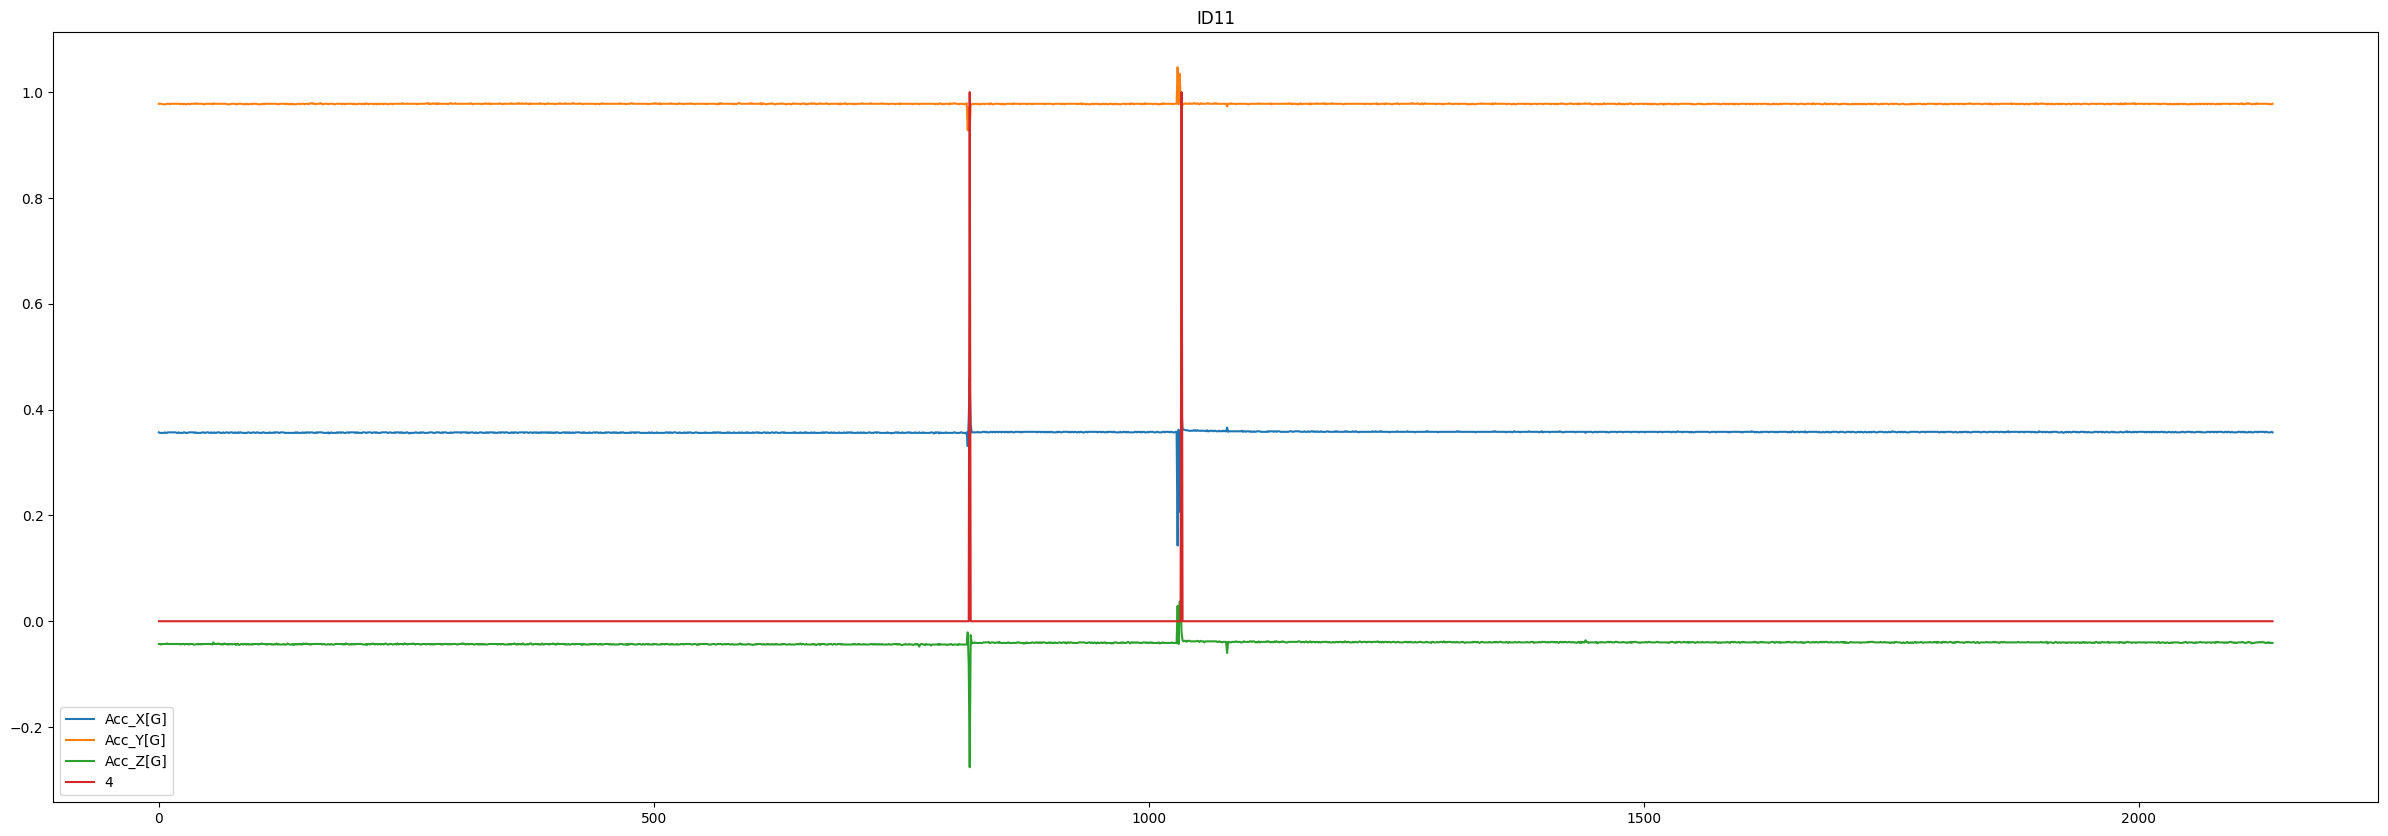

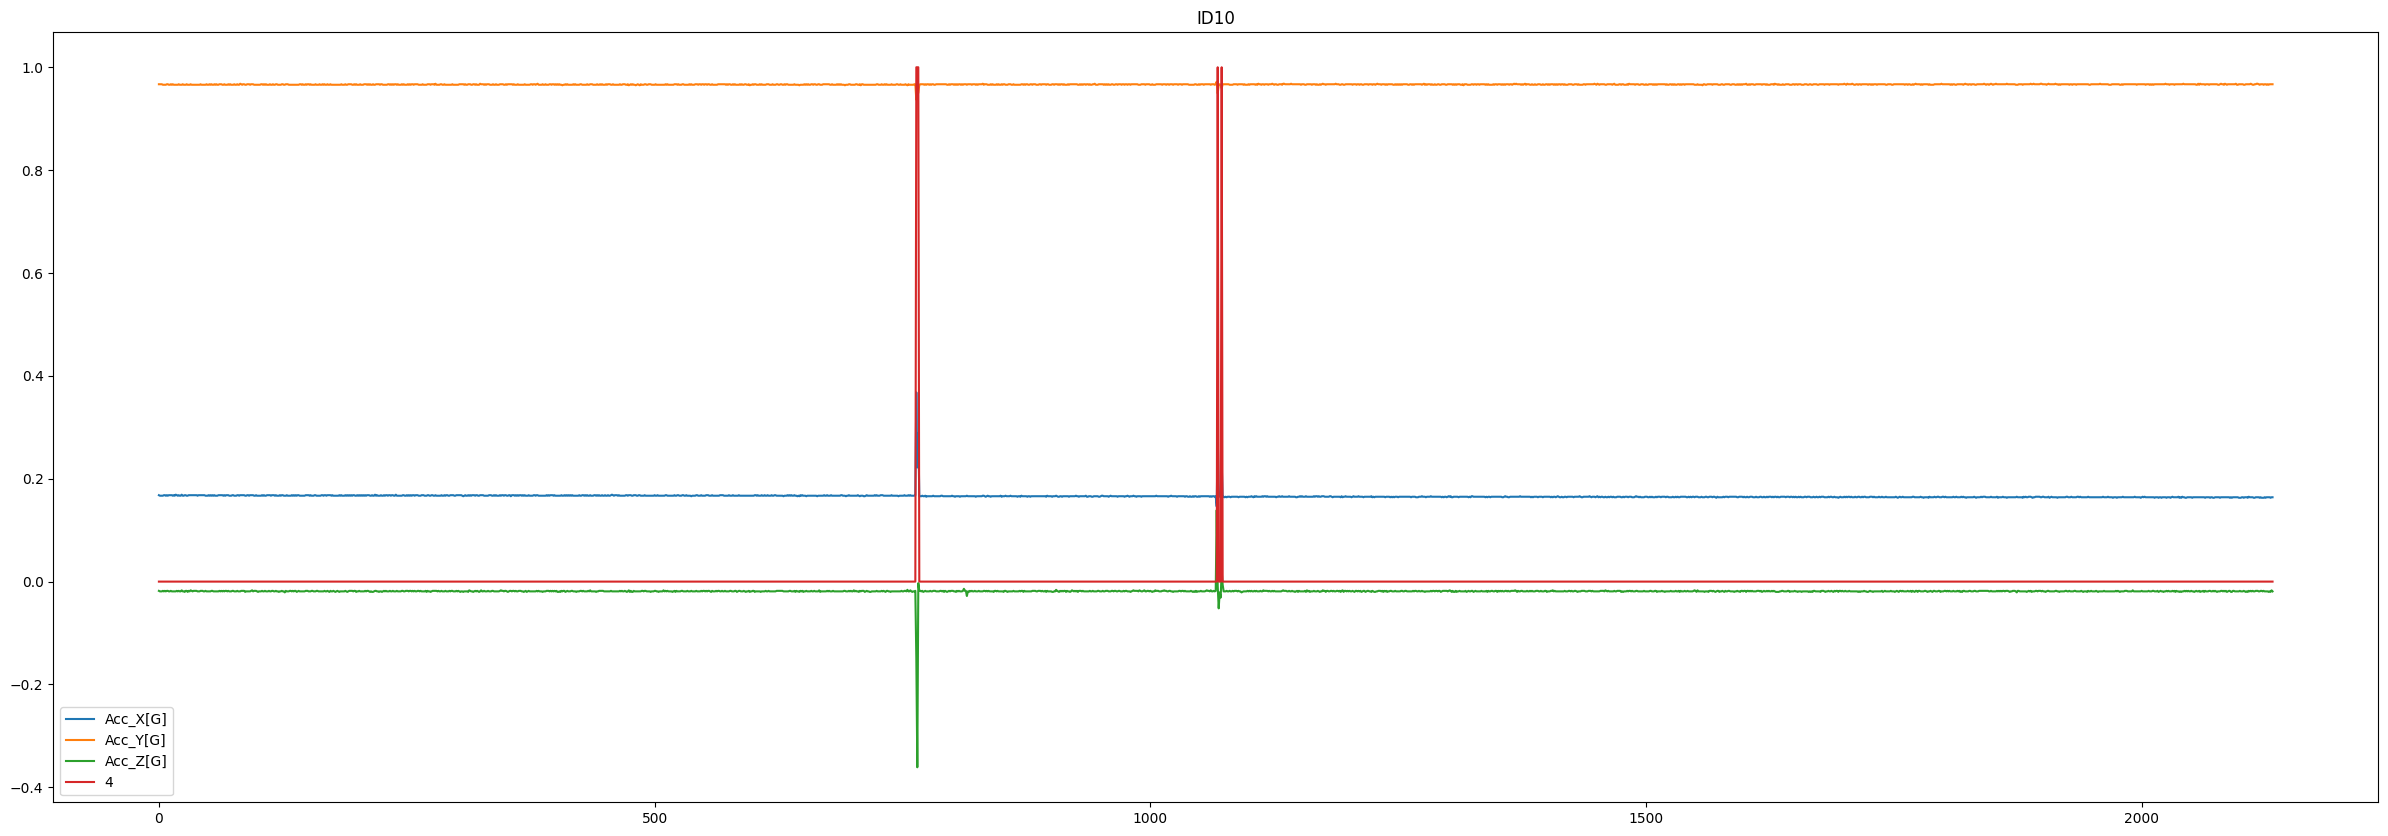

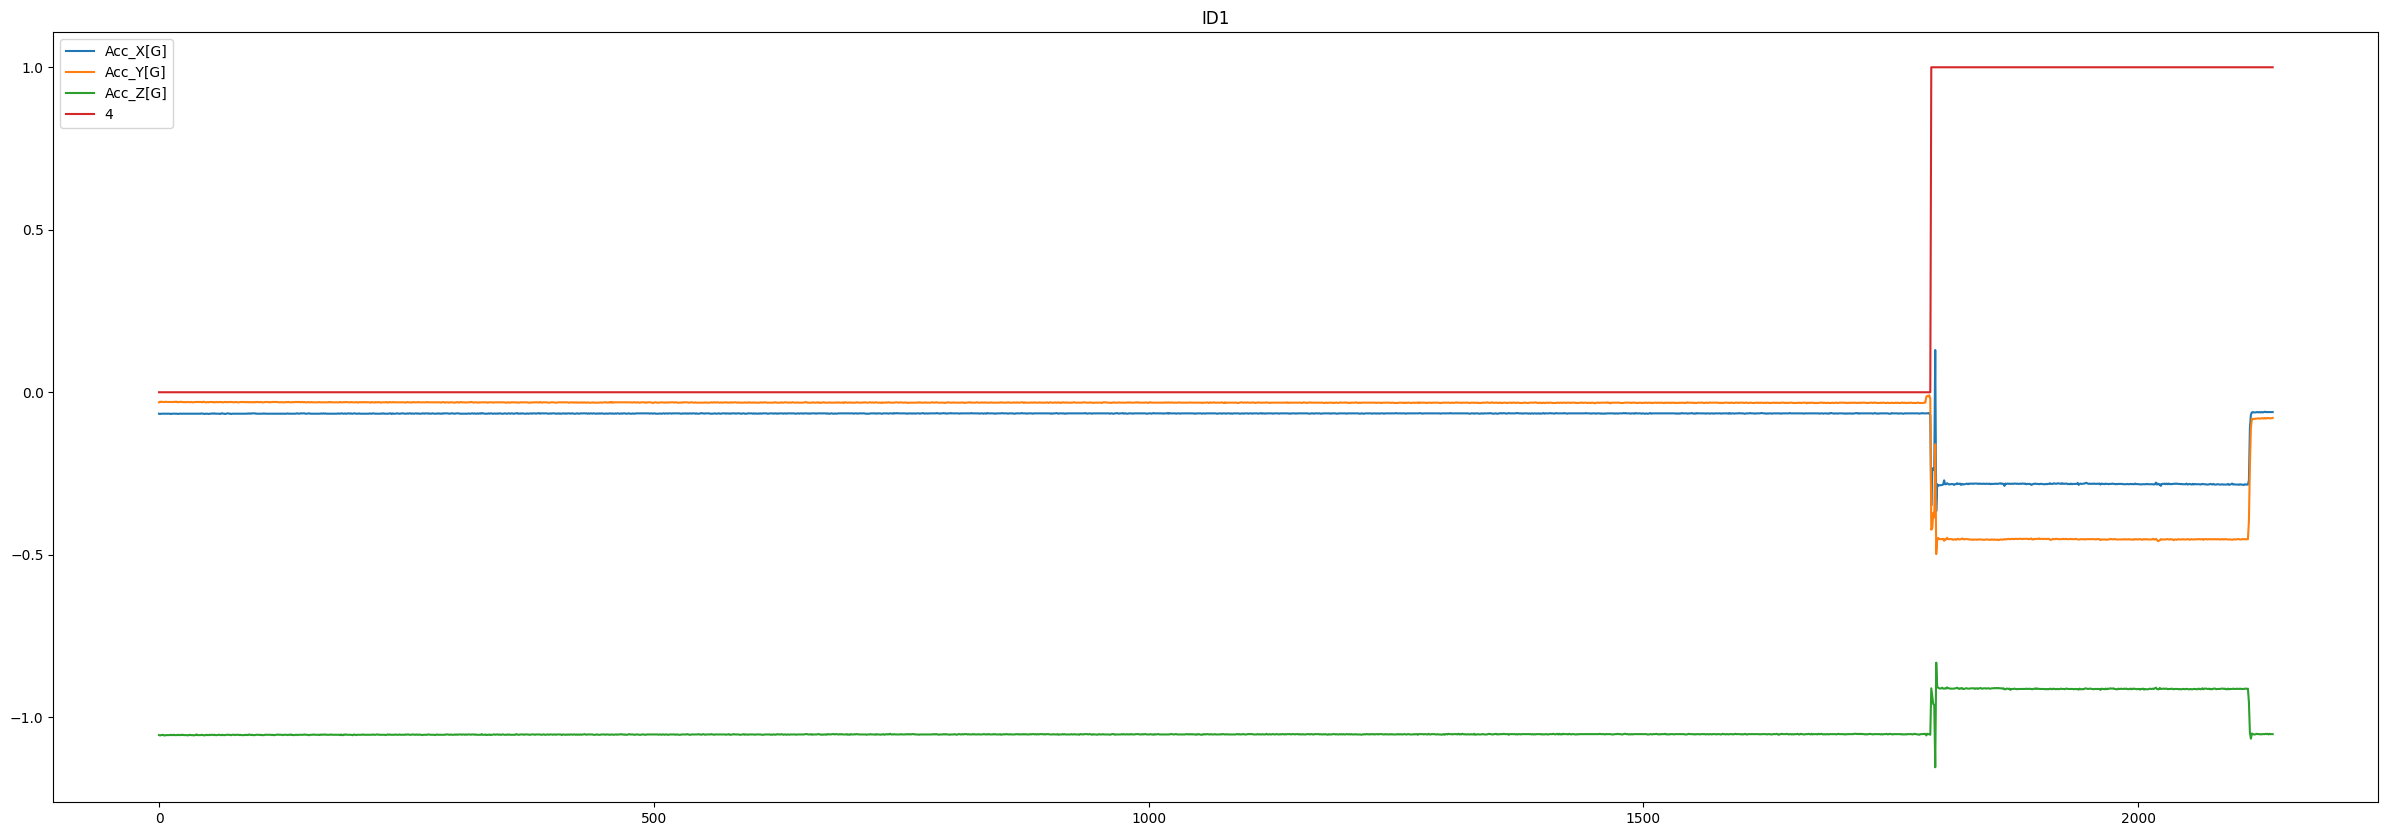

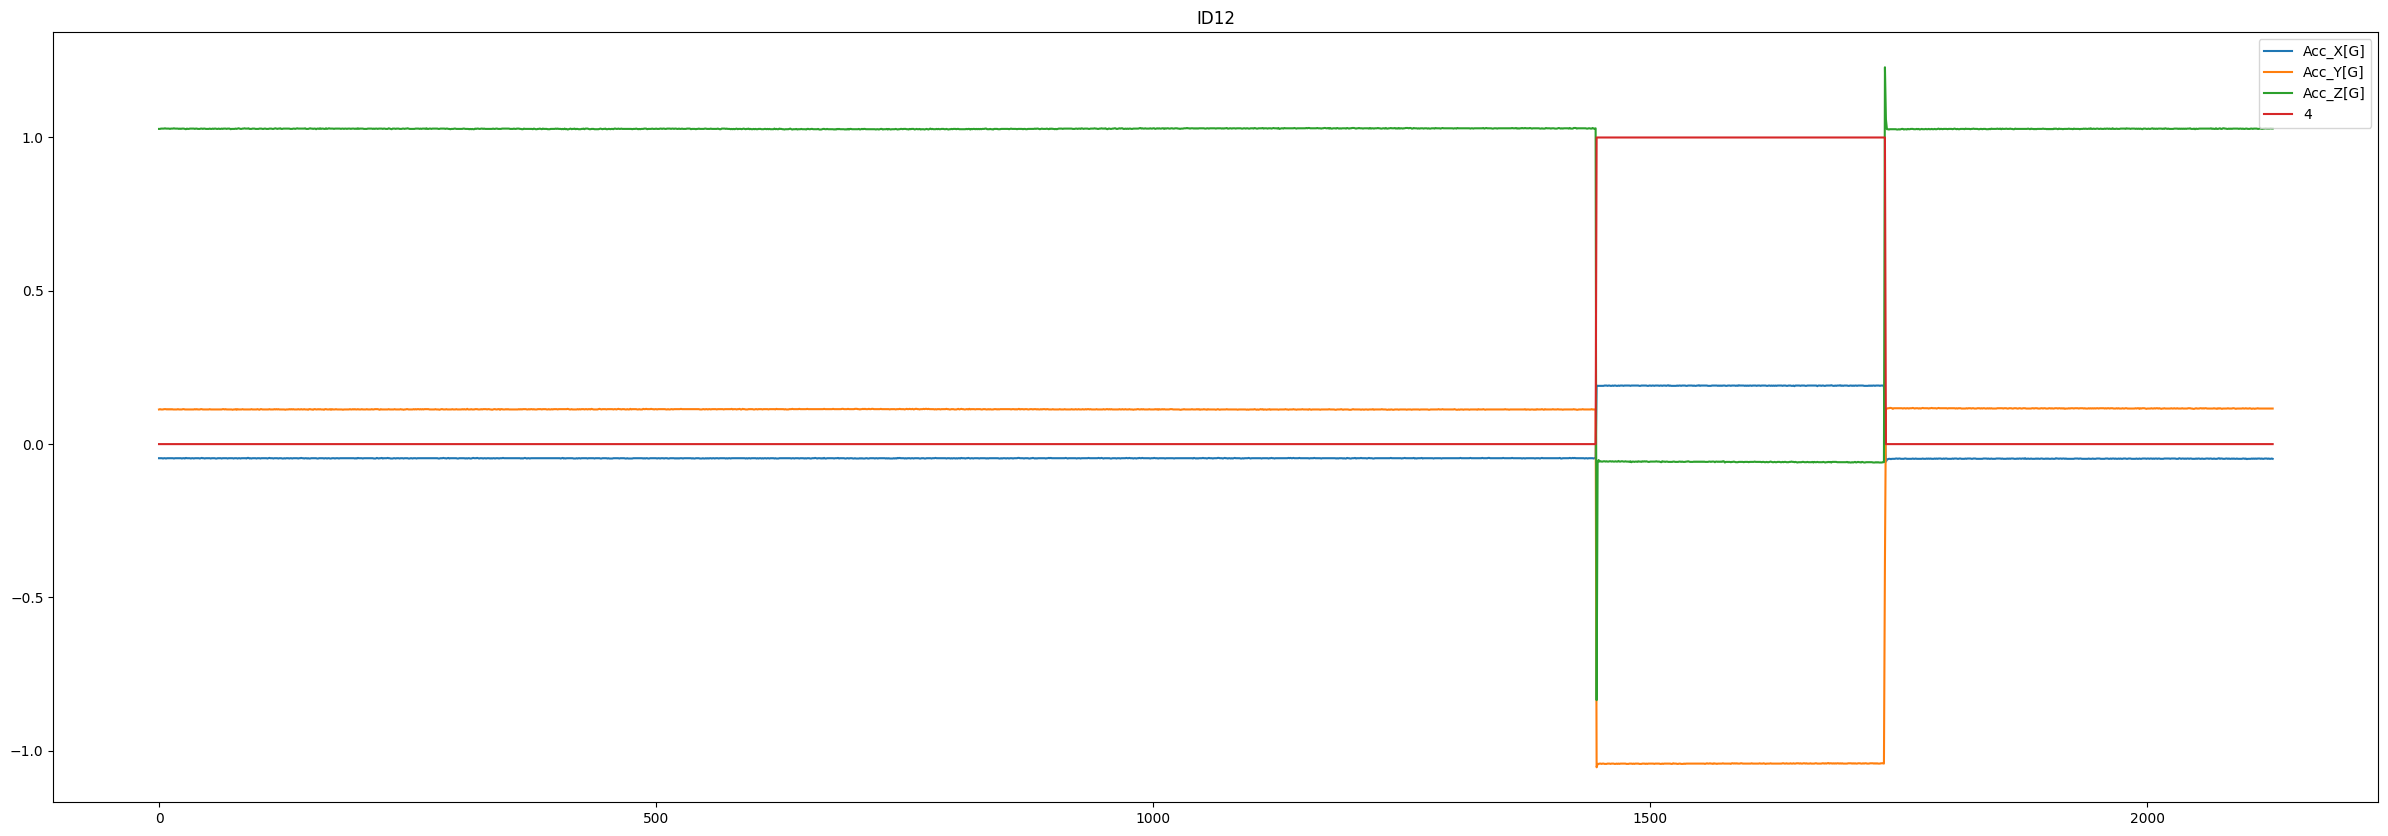

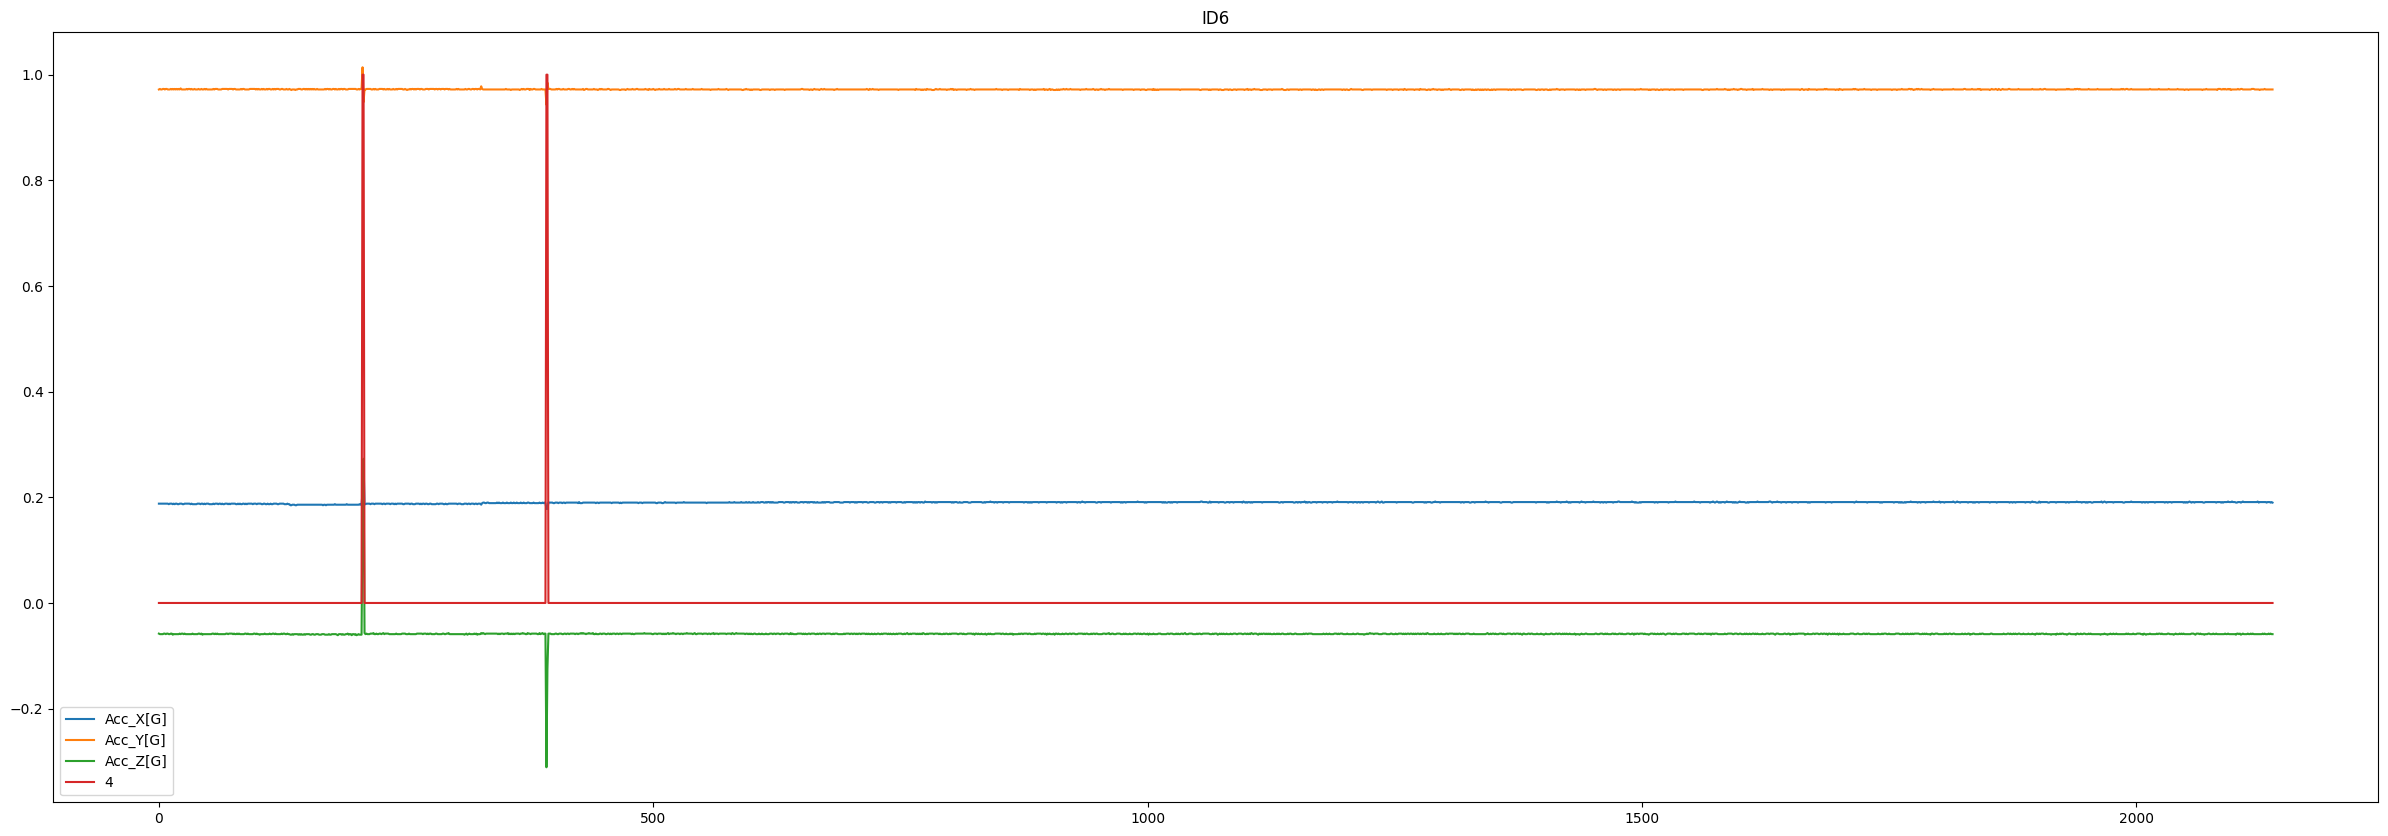

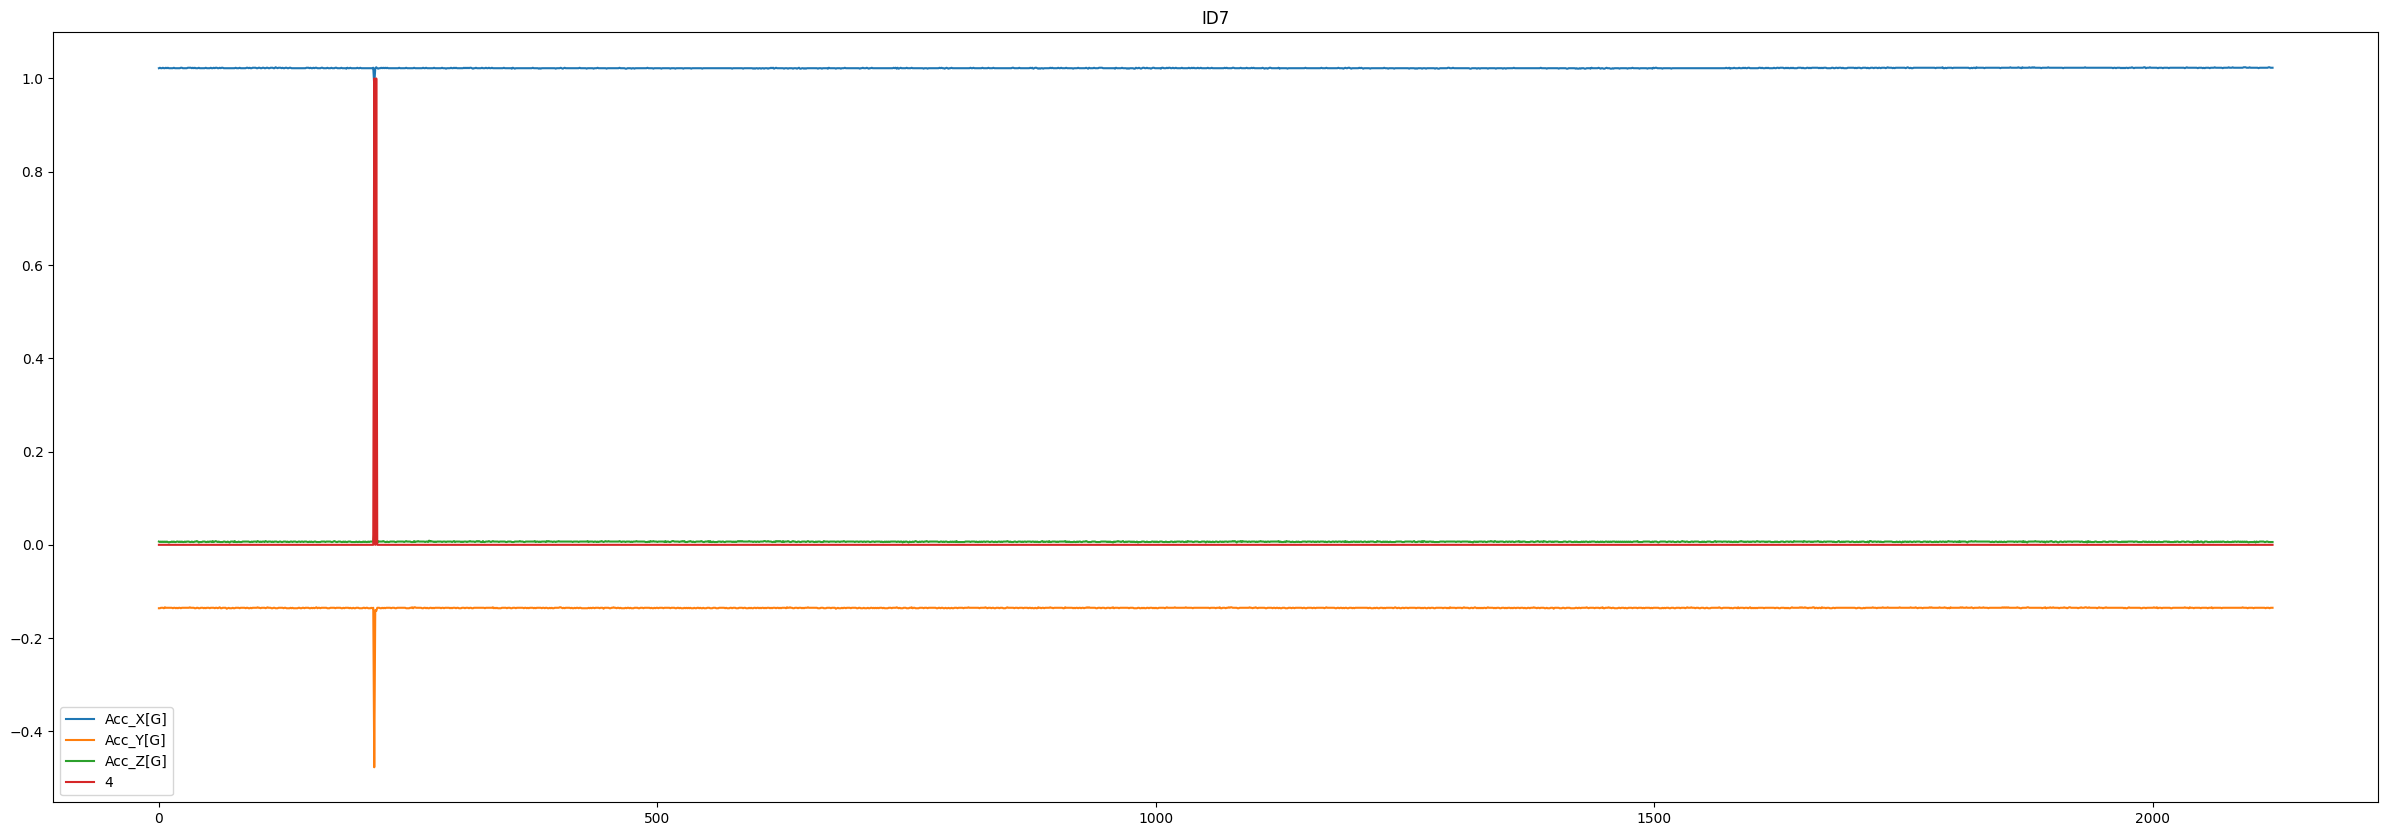

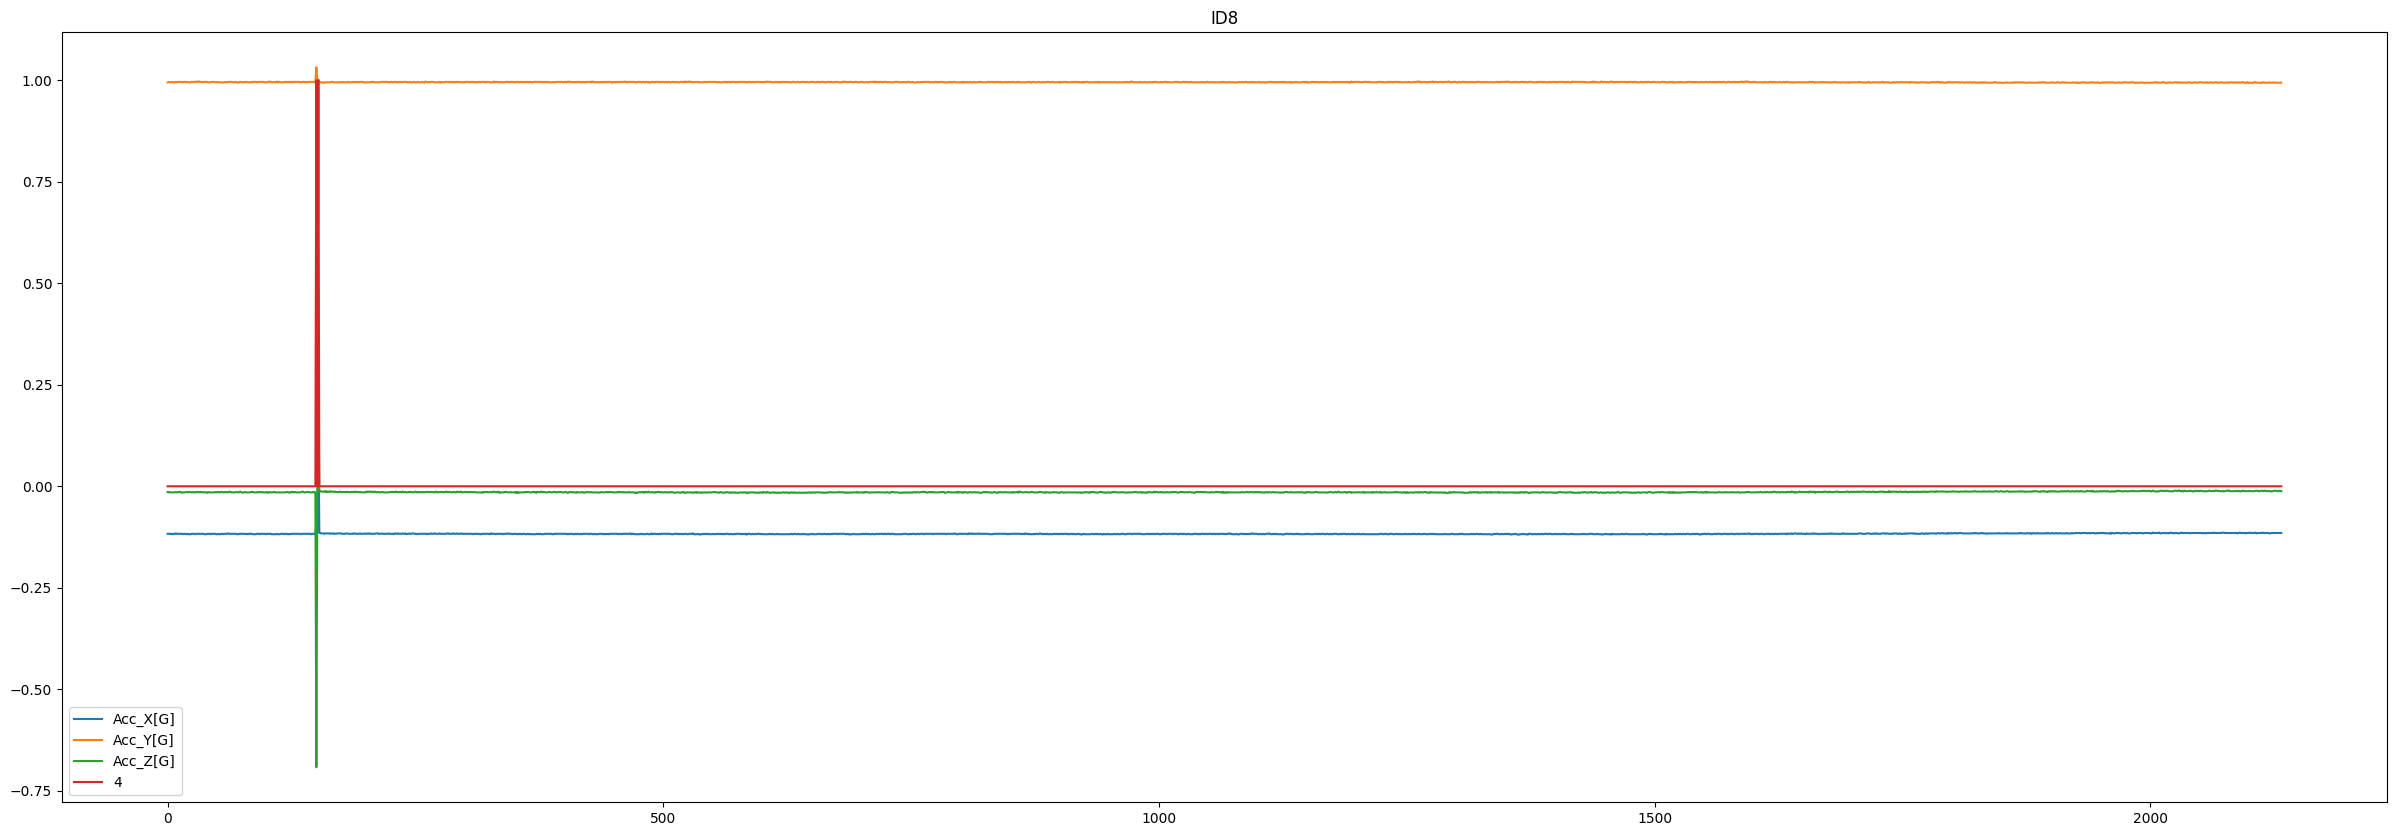

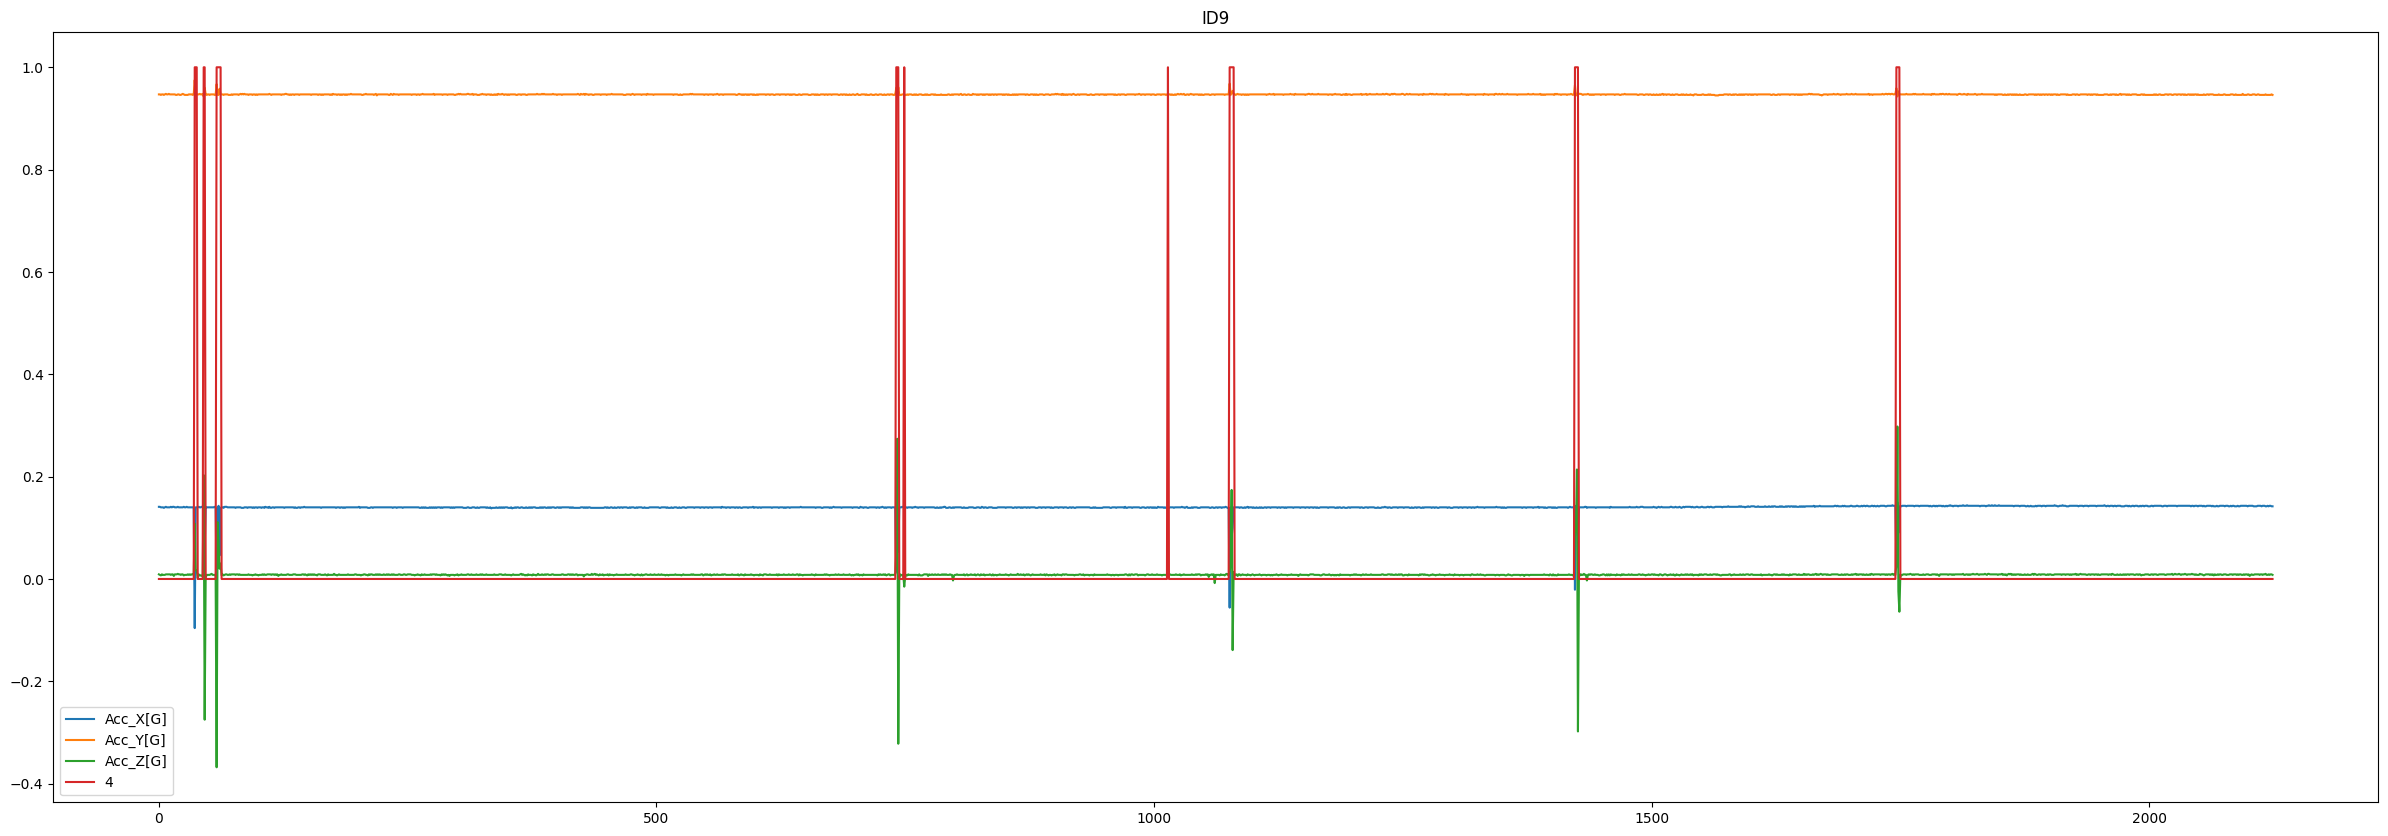

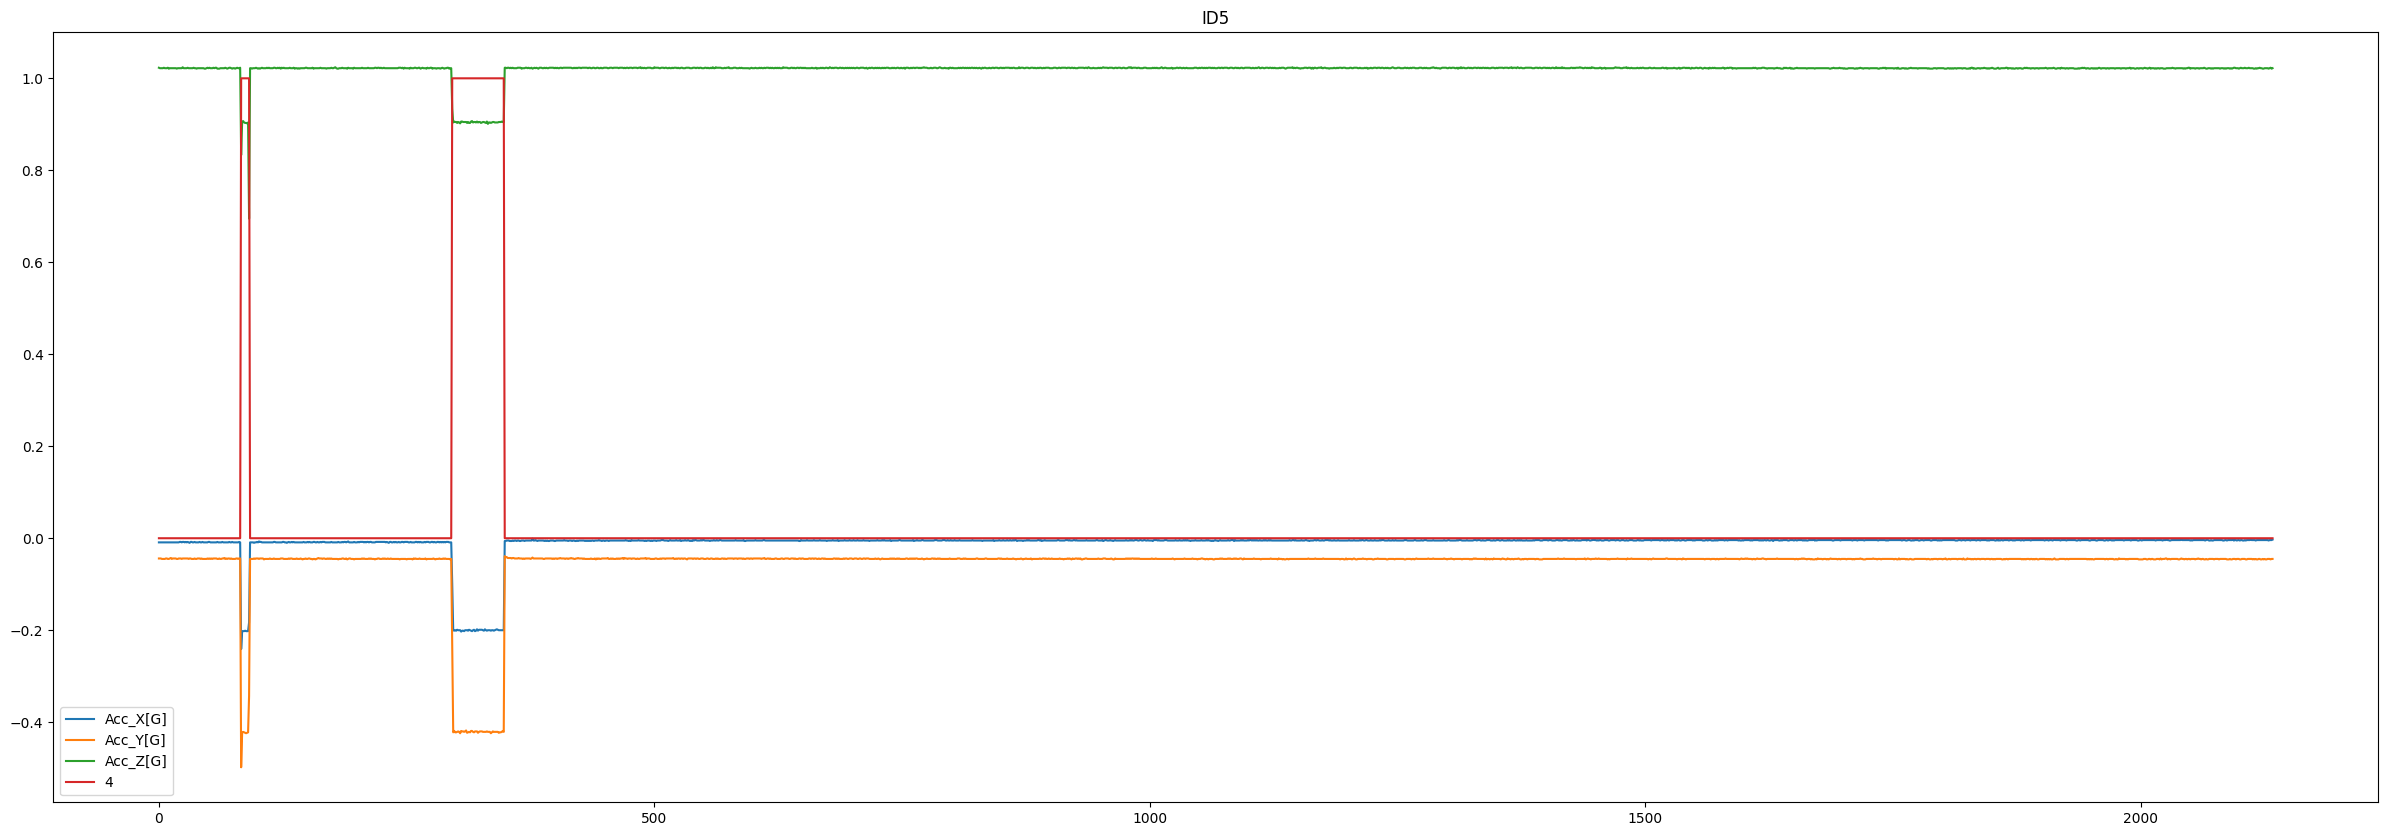

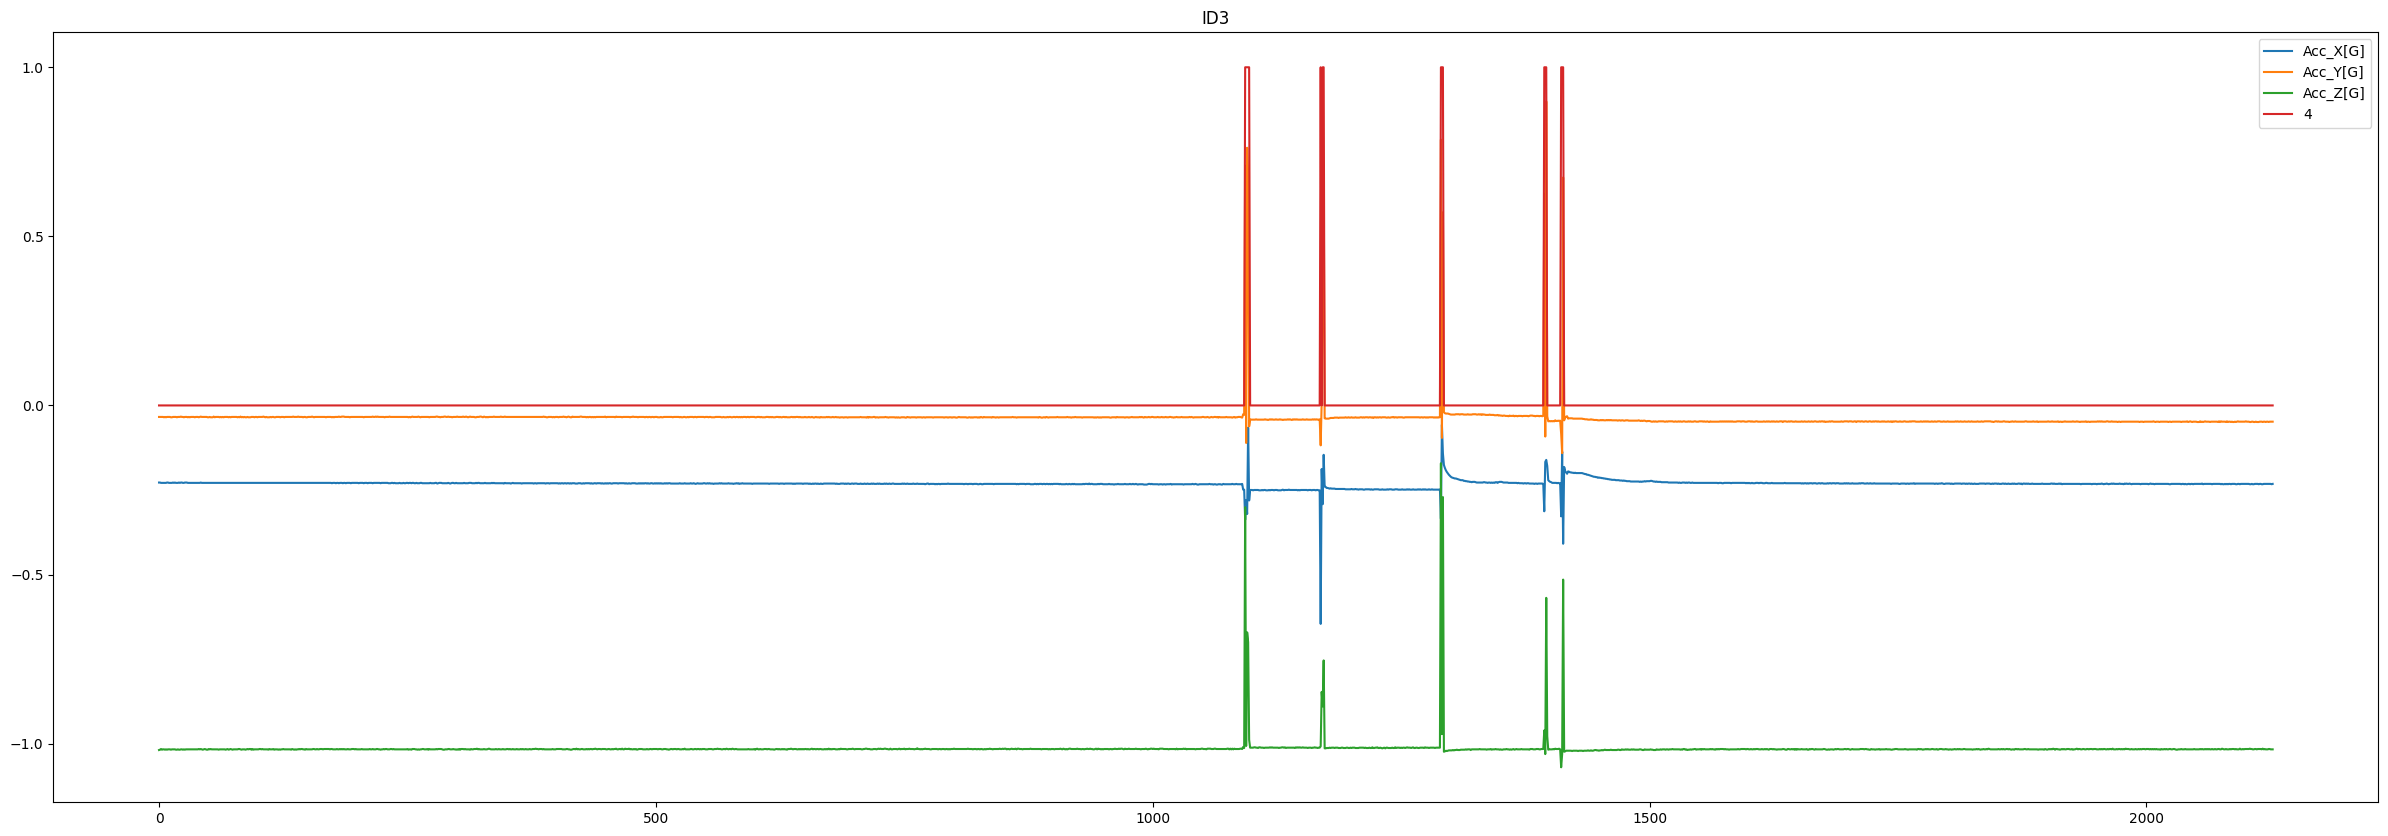

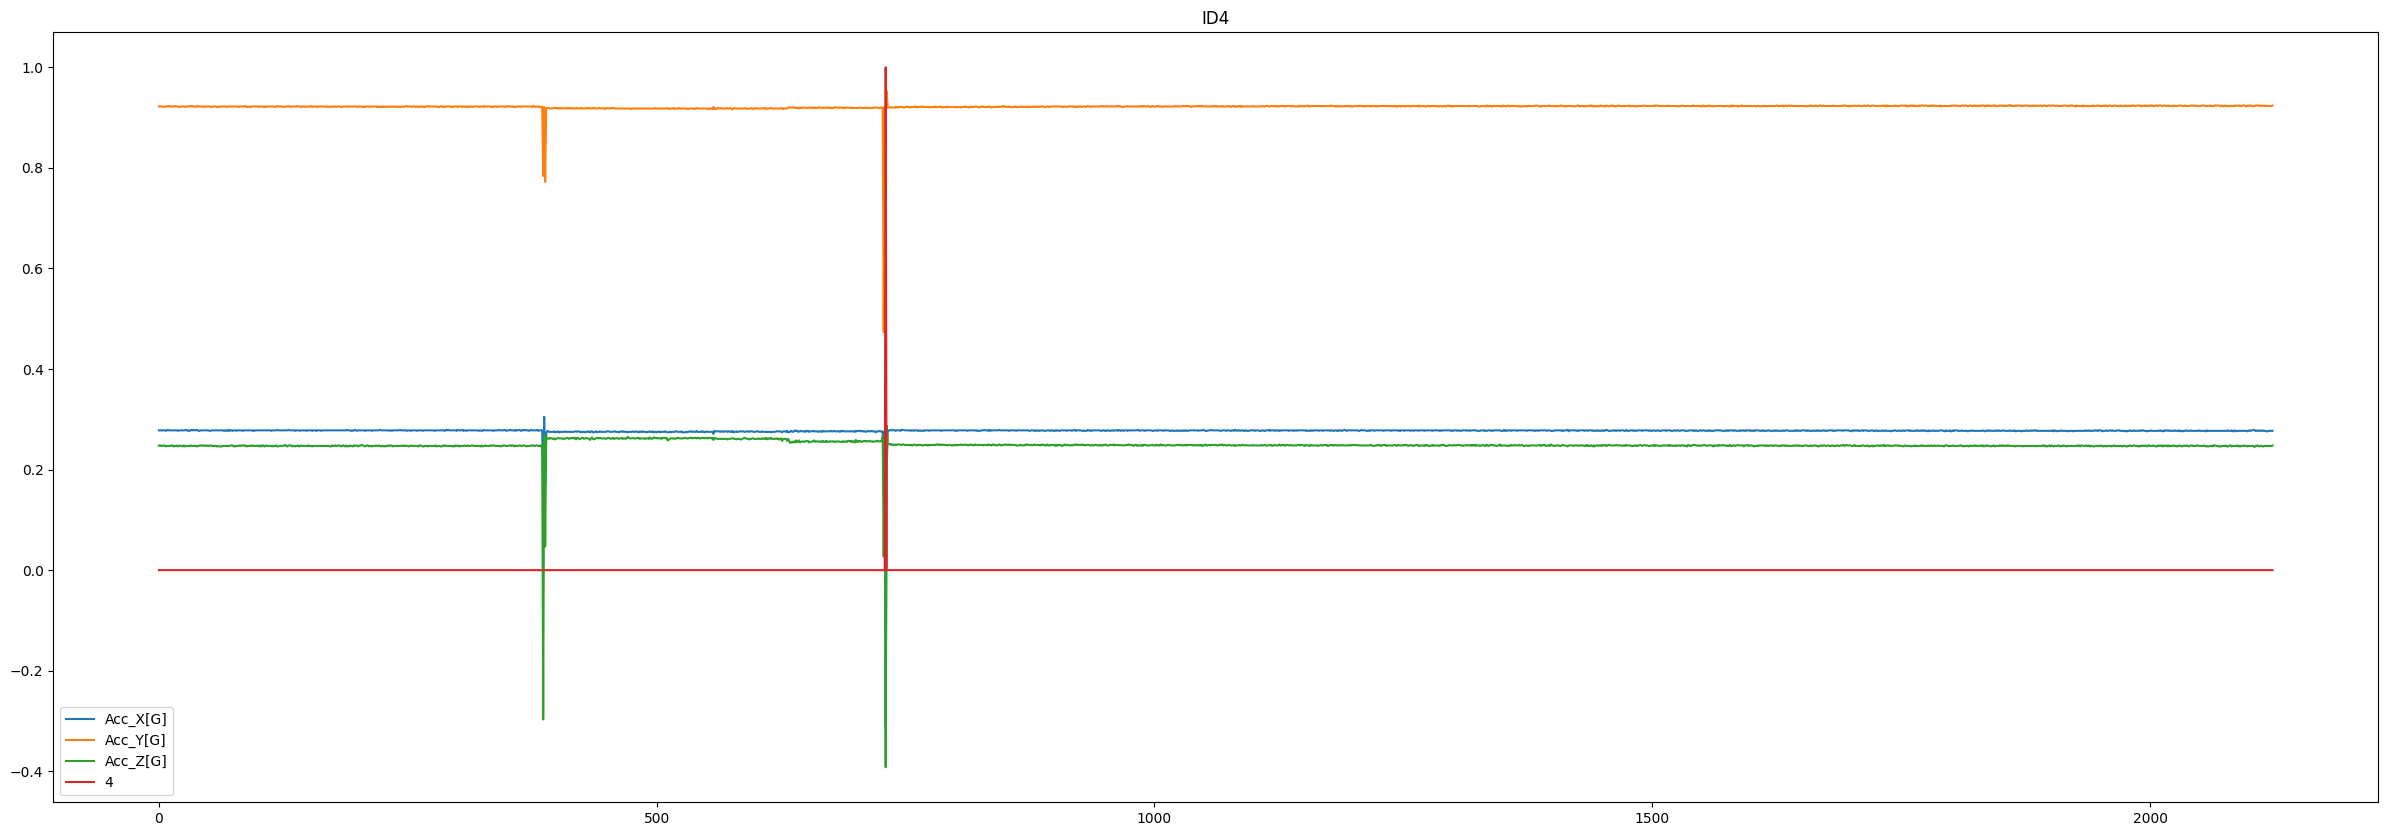

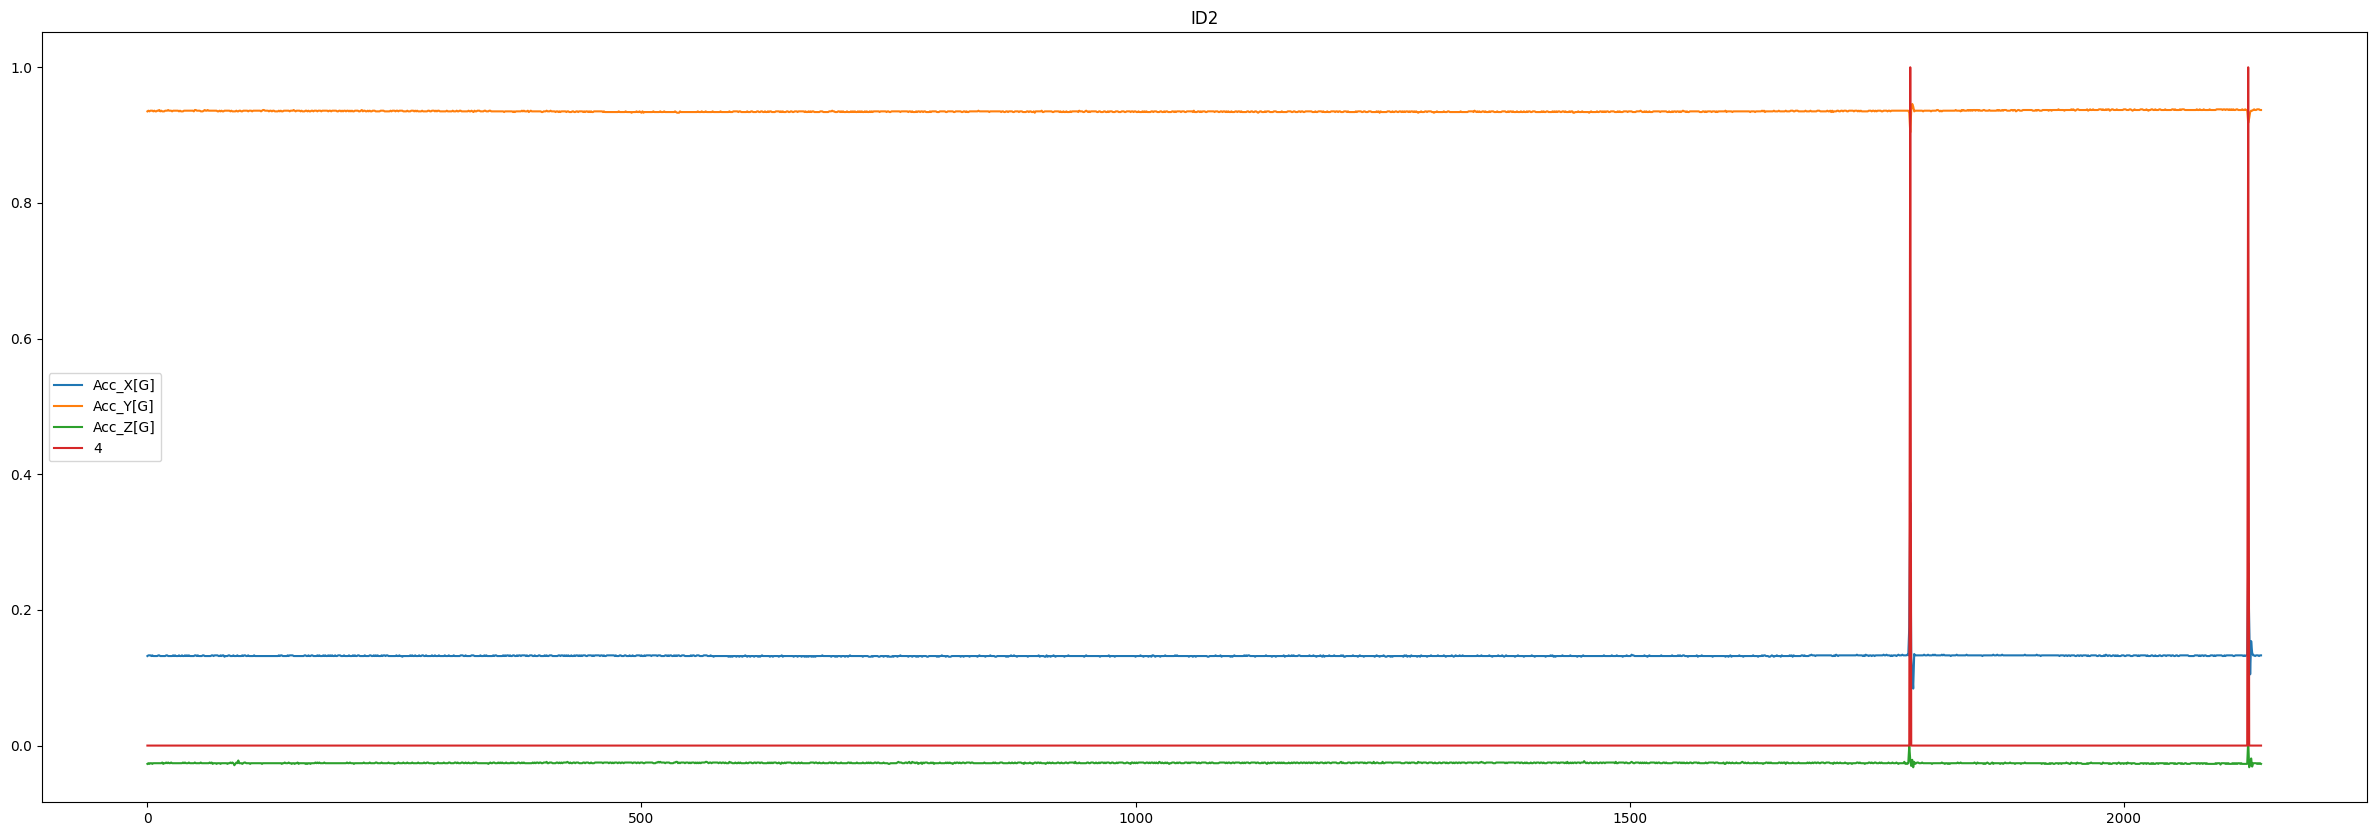

In [29]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

dirs = ["data"]
sessions = ["session3"]
ave_n = 3

sensors = {
    "D5":"ID1",
    "E7":"ID2",
    "E5":"ID3",
    "E6":"ID4",
    "E3":"ID5",
    "D9":"ID6",
    "DA":"ID7",
    "DB":"ID8",
    "DC":"ID9",
    "CD":"ID10",
    "CA":"ID11",
    "D6":"ID12"
}

#時間を揃える処理

for dir in dirs:
    for session in sessions:
        labeled_data = []
        label = []
        files = glob.glob(dir + "/" + session + "/*")
        for file in files:
            TH = 1.7
            df = pd.read_csv(file)
            df_tmp = df[["Acc_X[G]","Acc_Y[G]","Acc_Z[G]"]]
            
            ave_x = abs(sum(list(df["Acc_X[G]"])[:ave_n])/ave_n)
            ave_y = abs(sum(list(df["Acc_Y[G]"])[:ave_n])/ave_n)
            ave_z = abs(sum(list(df["Acc_Z[G]"])[:ave_n])/ave_n)
            tmp = []
            
            # if file[-24:-22] == "D9":
            #     TH = 1.05
            # elif file[-24:-22] == "E6":
            #     TH = 1.1
            # elif file[-24:-22] == "DC":
            #     TH = 1.1
            sensor = sensors[file[-24:-22]]
                
            for data in df_tmp.itertuples():
                x = data[1]
                y = data[2]
                z = data[3]
                if sensor == "ID11":
                    TH = 1.1
                    if abs(y) > ave_y*TH or abs(x) > ave_x*TH:
                        tmp.append(1)
                    else:
                        tmp.append(0)
                elif sensor == "ID10":
                    TH = 1.1
                    if abs(y) > ave_y*TH or abs(x) > ave_x*TH:
                        tmp.append(1)
                    else:
                        tmp.append(0)
                else:
                    if sensor == "ID4" or sensor == "ID6":
                        TH = 1.2

                    if abs(x) > ave_x*TH or abs(y) > ave_y*TH or abs(z) > ave_z*TH:
                        tmp.append(1)
                    else:
                        tmp.append(0)
            df_tmp[4] = tmp
            labeled_data.append(tmp)
            label.append(sensor)
            #print(file[:-3])
            #plt.figure(figsize=(30,4))
            df_tmp.plot(title=sensor,figsize=(30,10))
            #plt.savefig(file[:-3]+".png")
        df_save = pd.DataFrame(labeled_data,columns = label)
        df_save.to_csv(dir + "/" + session + "/data.csv")
        